<a href="https://colab.research.google.com/github/Hyeonwid/AIT_DL2023/blob/main/AIT_09_Author_classification_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [17]:
with open("/content/drive/MyDrive/09dl/schopenhauer.txt", "r") as f:
    schope = f.read()
    
with open("/content/drive/MyDrive/09dl/aquinas.txt", "r") as f:
    aquinas = f.read()
schope[0:100]

'\ufeff"Why do philosophers differ so widely as to the first principles of\nMorals, but agree respecting th'

## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

In [18]:
schope = schope[0:15000]
aquinas = aquinas[0:15000]

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [19]:
alphabet = sorted(set(schope + aquinas))
alphabet_length = len(alphabet)

def sliding_window(text, window_size, step_size=1):
    return [text[i:i + window_size] for i in range(0, len(text) - window_size, step_size)]
char_to_index = {c: i for i, c in enumerate(alphabet)}

sequence_length = 60

author1_sequences = sliding_window(schope, sequence_length)
author2_sequences = sliding_window(aquinas, sequence_length)

one_hot_encoded_sequences = []
for seq in author1_sequences + author2_sequences:
    one_hot_encoded_seq = np.zeros((sequence_length, alphabet_length))
    for i, char in enumerate(seq):
        one_hot_encoded_seq[i, char_to_index[char]] = 1
    one_hot_encoded_sequences.append(one_hot_encoded_seq)

X = np.stack(one_hot_encoded_sequences)
y = np.array([0] * len(author1_sequences) + [1] * len(author2_sequences))

## Data splitting
Split the data into train, validate and test sets. Make 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [21]:
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, alphabet_length), dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training
Train the model and apply early stopping.

In [22]:

epochs = 10
batch_size = 32

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)



Epoch 1/10
673/673 [==============================] - 80s 114ms/step - loss: 0.4451 - accuracy: 0.7894 - val_loss: 0.2702 - val_accuracy: 0.8837
Epoch 2/10
673/673 [==============================] - 74s 110ms/step - loss: 0.3175 - accuracy: 0.8644 - val_loss: 0.2025 - val_accuracy: 0.9226
Epoch 3/10
673/673 [==============================] - 74s 110ms/step - loss: 0.2500 - accuracy: 0.8969 - val_loss: 0.2246 - val_accuracy: 0.8996
Epoch 4/10
673/673 [==============================] - 74s 110ms/step - loss: 0.1913 - accuracy: 0.9245 - val_loss: 0.0841 - val_accuracy: 0.9783
Epoch 5/10
673/673 [==============================] - 74s 109ms/step - loss: 0.1423 - accuracy: 0.9453 - val_loss: 0.1272 - val_accuracy: 0.9389
Epoch 6/10
673/673 [==============================] - 74s 110ms/step - loss: 0.1256 - accuracy: 0.9516 - val_loss: 0.0417 - val_accuracy: 0.9891
Epoch 7/10
673/673 [==============================] - 74s 110ms/step - loss: 0.1035 - accuracy: 0.9618 - val_loss: 0.0520 - val_ac

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

187/187 [==============================] - 3s 16ms/step - loss: 0.0137 - accuracy: 0.9956
Test loss: 0.013741531409323215
Test accuracy: 0.9956492781639099
187/187 [==============================] - 5s 24ms/step


## Confusion matrix
Calculate and display the confusion matrix.

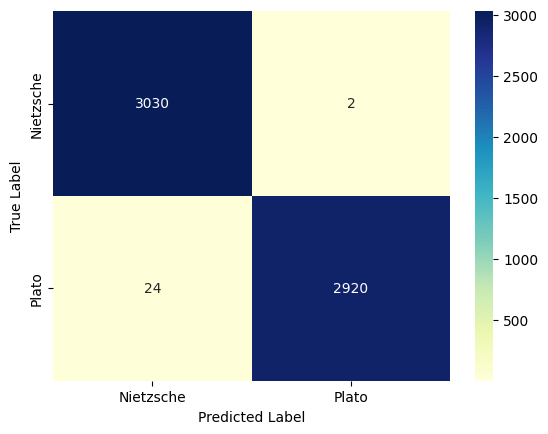

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Nietzsche", "Plato"], yticklabels=["Nietzsche", "Plato"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()